In [32]:
from BPTK_Py import Model, bptk
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# 1) Model initialization
model = Model(starttime=0.0, stoptime=50.0, dt=0.1, name="ants_sd_clean")

# 2) Stocks + initial values
A = model.stock("A")  # Ameisen
A.initial_value = 0.5
H = model.stock("H")  # Habitat
H.initial_value = 0.6
S = model.stock("S")  # Schädlinge
S.initial_value = 0.5
I = model.stock("I")  # Invasive
I.initial_value = 0.2
W = model.stock("W")  # Waldstabilität
W.initial_value = 0.8
N = model.stock("N")  # Nistplätze
N.initial_value = 0.5
E = model.stock("E")  # Ökosystemleistungen
E.initial_value = 0.6

In [34]:
# 3) Constants (simplified names)
const = {
    # Ameisen
    "rA": 0.8, "mA": 0.15, "pA": 0.05, "cAS": 0.12,
    # Schädlinge
    "rS": 0.6, "kAS": 0.9, "uP": 0.5,
    # Habitat
    "alp": 0.3, "bet": 0.25, "gam": 0.2, "delSH": 0.15,
    # Invasive
    "rI": 0.3, "compAI": 0.35, "climI": 0.3,
    # Wald & Leistungen
    "om": 0.25, "xiE": 0.3, "chi": 0.1,
    # Saturation constants
    "hhalf": 0.3, "nhalf": 0.4
}

# Assign constants to model with correct numeric values
for k, v in const.items():
    constant = model.constant(k)  # Retrieve or create the constant
    constant.equation = v  # Set the equation after creating the constant

In [35]:
# 4) Scenario drivers (can be overridden)
model.constant("NS").equation = 0.4  # Naturschutz
model.constant("FRAG").equation = 0.5  # Fragmentierung
model.constant("KLIMA").equation = 0.4  # Klimastress
model.constant("PESTI").equation = 0.4  # Pestizideinsatz

In [36]:
# 5) Helper (Saturation functions)
fH = model.converter("fH")  # Create the converter for fH
fH.equation = "H/(H + hhalf)"  # Set the equation for fH

fN = model.converter("fN")  # Create the converter for fN
fN.equation = "N/(N + nhalf)"  # Set the equation for fN

In [37]:
# 6) Direct rate equations (no growth_/loss_ Converter!)
dA = model.converter("dA")  # Converter for dA
dA.equation = "rA*A*fH*fN - (mA + pA*PESTI)*A - cAS*A*S - compAI*I*A"  # Set the equation

dH = model.converter("dH")  # Converter for dH
dH.equation = "alp*NS - bet*FRAG - gam*KLIMA - delSH*S*H"  # Set the equation

dS = model.converter("dS")  # Converter for dS
dS.equation = "rS*S - kAS*A*S - uP*PESTI*S"  # Set the equation

dI = model.converter("dI")  # Converter for dI
dI.equation = "rI*I + climI*KLIMA - 0.3*A*I"  # Set the equation

dW = model.converter("dW")  # Converter for dW
dW.equation = "om*H*A - chi*KLIMA*W"  # Set the equation

dN = model.converter("dN")  # Converter for dN
dN.equation = "0.6*H - 0.2*N"  # Set the equation

dE = model.converter("dE")  # Converter for dE
dE.equation = "xiE*A - 0.1*E"  # Set the equation

# Link stocks to rate equations
A.equation = dA
H.equation = dH
S.equation = dS
I.equation = dI
W.equation = dW
N.equation = dN
E.equation = dE

In [38]:
# 7) bptk facade + scenarios
b = bptk()
b.register_model(model)
b.register_scenario_manager({"smAnts": {"model": model, "base_constants": const}})

# Define scenarios
scenarios = {
    "Baseline": {"constants": {}},
    "Naturschutz_plus": {"constants": {"NS": 0.8, "PESTI": 0.3}},
    "Weniger_Pestizide": {"constants": {"PESTI": 0.1}},
    "Mehr_KlimaStress": {"constants": {"KLIMA": 0.8}},
    "Fragmentierung_hoch": {"constants": {"FRAG": 0.8}},
}
b.register_scenarios(scenarios, scenario_manager="smAnts")

Exception in thread Thread-23 (__simulate):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-24 (__simulate):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\FHNW\mss\mss_ameisen\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
Exception in thread Thread-25 (__simulate):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\FHNW\mss\mss_ameisen\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 788, in run_closure
Exception in thread Thread-26 (__simulate):
Traceback (mos

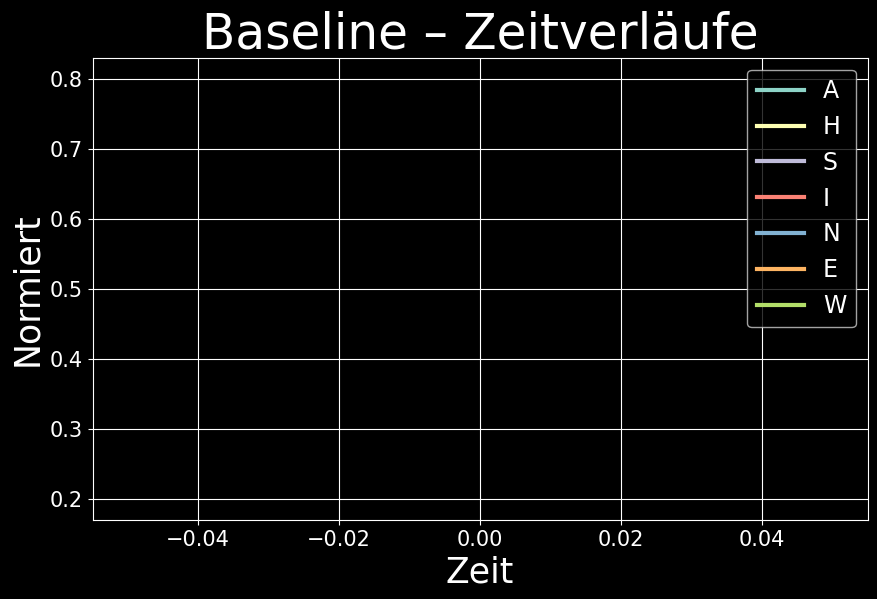

In [39]:
# 8) Baseline run (executes the simulation)
df_base = b.plot_scenarios(
    scenarios="Baseline",
    scenario_managers="smAnts",
    equations=["A", "H", "S", "I", "N", "E", "W"],
    return_df=True
)

# Plotting
ax = df_base[["A", "H", "S", "I", "N", "E", "W"]].plot(figsize=(10, 6), title="Baseline – Zeitverläufe")
ax.set_xlabel("Zeit")
ax.set_ylabel("Normiert")
ax.grid(True)
plt.show()